$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$

# <center> Assignment 2: Neural Network Regression </center>

<center> Vignesh M. Pagadala </center>
<center> Department of Computer Science </center>
<center> Colorado State University </center>
<center> Vignesh.Pagadala@colostate.edu </center>

## Overview

In this assignment, we look into trying out a number of different neural network configurations (by varying the number of hidden layers), and also try different number of iterations to see which combination would give us the least Root Mean Squared Error (RMSE). We analyse different configurations and look at how each configuration behaves, and describe, the same. We also intend to identify structures which give a bettter performance than the others, and investigate as to why this may be the case.  

## Implementation

In [140]:
import numpy as np
import matplotlib.pyplot as plt
import neuralnetworksA2 as nn
import pandas as pd
import random

*neuralnetworksA2* contains the NeuralNetwork class, used for creating, training and using a neural network. We also define two functions for inclusion in the NeuralNetworks class.
 
1. activation: Takes in an argument and returns the hyperbolic tangent of the same.
2. activationDerivative: Returns the derivative of the activation function. 

A neural network with one hidden layer containing 10 neurons, 1 input and 1 output neuron is instantiated as follows:

In [136]:
nnet = nn.NeuralNetwork(1, [10], 1)

In [39]:
[nnet.activation(s) for s in [-2, -0.5, 0, 0.5, 2]]

[-0.9640275800758169,
 -0.46211715726000974,
 0.0,
 0.46211715726000974,
 0.9640275800758169]

In [40]:
[nnet.activationDerivative(nnet.activation(s)) for s in [-2, -0.5, 0, 0.5, 2]]

[0.07065082485316443,
 0.7864477329659274,
 1.0,
 0.7864477329659274,
 0.07065082485316443]

Let's create some sample data.

In [137]:
X = np.arange(10).reshape((-1,1))
T = np.sin(X)

To train the neural network, with X as input and T as target data, over 100 iterations.

In [138]:
nnet.train(X, T, 100, verbose=True)
nnet

SCG: Iteration 10 fValue Eval 0.49723835893555757 Scale 0.004096
SCG: Iteration 20 fValue Eval 0.18319914653128327 Scale 0.000256
SCG: Iteration 30 fValue Eval 0.06431274352857151 Scale 2.5e-07
SCG: Iteration 40 fValue Eval 0.03203688888830879 Scale 4.8828125e-10
SCG: Iteration 50 fValue Eval 0.02332998527198732 Scale 4.76837158203125e-13
SCG: Iteration 60 fValue Eval 0.019059653496475704 Scale 1e-15
SCG: Iteration 70 fValue Eval 0.01627889552711104 Scale 1e-15
SCG: Iteration 80 fValue Eval 0.014417410756502875 Scale 1e-15
SCG: Iteration 90 fValue Eval 0.012114464580331158 Scale 1e-15
SCG: Iteration 100 fValue Eval 0.010185751595171431 Scale 1e-15


NeuralNetwork(1, [10], 1)
   Network was trained for 101 iterations that took 0.0523 seconds. Final error is 0.10092448461682343.

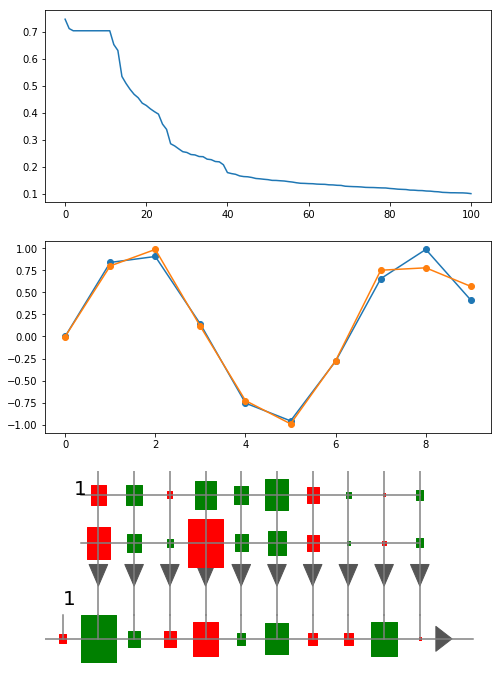

In [139]:
plt.figure(figsize=(8, 12))
plt.subplot(3, 1, 1)
plt.plot(nnet.getErrors())

plt.subplot(3, 1, 2)
plt.plot(X, T, 'o-', label='Actual')
plt.plot(X, nnet.use(X), 'o-', label='Predicted')

plt.subplot(3, 1, 3)
nnet.draw()

## Neural Network Performance with Varying Hidden Layer Structures and Numbers of Training Iterations

## 1. Toy Data
Firstly, let's try this out with some simple data. We consider X to be input and T to be the expected target output. We split them into training (80 %) and testing (20 %) data. **Note: The following snippet of code was provided by Dr Charles Anderson as a part of the CS445 class notes.**  

In [44]:
nRows = X.shape[0]
rows = np.arange(nRows)
np.random.shuffle(rows)
nTrain = int(nRows * 0.8)
trainRows = rows[:nTrain]
testRows = rows[nTrain:]
Xtrain, Ttrain = X[trainRows, :], T[trainRows, :]
Xtest, Ttest = X[testRows, :], T[testRows, :]

In [45]:
Xtrain.shape, Ttrain.shape, Xtest.shape, Ttest.shape

((8, 1), (8, 1), (2, 1), (2, 1))

In [167]:
# Function to calculate RMSE. 
def rmse(A, B):
    return np.sqrt(np.mean((A - B)**2))

Let's try different combinations of hidden layer structures, and see which one yeilds the least RMSE. 

hiddens = [0, [1], [1, 1], [1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1, 1], [5], [5, 5], [5, 5, 5], [5, 5, 5, 5], [5, 5, 5, 5, 5], [10], [10, 10], [10, 10, 10], [10, 10, 10, 10], [10, 10, 10, 10, 10], [20], [20, 20], [20, 20, 20], [20, 20, 20, 20], [20, 20, 20, 20, 20], [50], [50, 50], [50, 50, 50], [50, 50, 50, 50], [50, 50, 50, 50, 50]]
                       0             1         2
0                      0  6.136431e-01  0.900955
1                    [1]  5.359950e-01  0.776112
2                 [1, 1]  5.359950e-01  0.776112
3              [1, 1, 1]  5.359950e-01  0.776112
4           [1, 1, 1, 1]  5.359950e-01  0.776112
5        [1, 1, 1, 1, 1]  5.492875e-01  0.874424
6                    [5]  2.699782e-15  0.306027
7                 [5, 5]  6.396691e-15  0.435793
8              [5, 5, 5]  1.841025e-15  0.455731
9           [5, 5, 5, 5]  4.900878e-15  0.411764
10       [5, 5, 5, 5, 5]  3.137501e-15  0.410584
11                  [10]  7.921248e-15  0.248637
12              [10, 10]  6.5

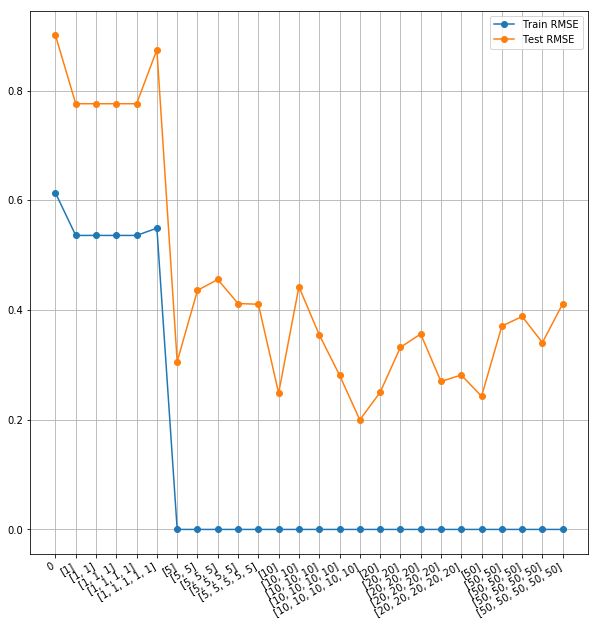

In [48]:
errors = []
hiddens = [0] + [[nu] * nl for nu in [1, 5, 10, 20, 50] for nl in [1, 2, 3, 4, 5]]
print('hiddens =', hiddens)
for hids in hiddens: 
    nnet = nn.NeuralNetwork(Xtrain.shape[1], hids, Ttrain.shape[1])
    nnet.train(Xtrain, Ttrain, 500)
    errors.append([hids, rmse(Ttrain, nnet.use(Xtrain)), rmse(Ttest, nnet.use(Xtest))])
errors = pd.DataFrame(errors)
print(errors)

plt.figure(figsize=(10, 10))
plt.plot(errors.values[:, 1:], 'o-')
plt.legend(('Train RMSE', 'Test RMSE'))
plt.xticks(range(errors.shape[0]), hiddens, rotation=30, horizontalalignment='right')
plt.grid(True)

From the plot above, we can observe that, the hidden layer configuration with the lowest error is [10, 10, 10, 10, 10]. Let's take this hidden layer configuration and try it with varying number of iterations.

In [141]:
hidden = [10, 10, 10, 10, 10]
nIterationsList = [10, 20, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
error = []

In [142]:
for iter in nIterationsList:
    nnet = nn.NeuralNetwork(Xtrain.shape[1], hidden, Ttrain.shape[1])
    nnet.train(Xtrain, Ttrain, iter)
    error.append([iter, rmse(Ttrain, nnet.use(Xtrain)), rmse(Ttest, nnet.use(Xtest))])

[10, 20, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
      0             1         2
0    10  6.084300e-01  0.924417
1    20  4.932875e-01  0.591142
2    50  1.057879e-01  0.338649
3   100  2.794660e-06  0.476299
4   150  1.433242e-02  0.351414
5   200  8.036386e-12  0.484304
6   250  2.799233e-11  0.364671
7   300  4.069738e-09  0.262202
8   350  9.101415e-11  0.303343
9   400  2.180969e-15  0.474889
10  450  1.895062e-10  0.368720
11  500  1.872002e-06  0.391831


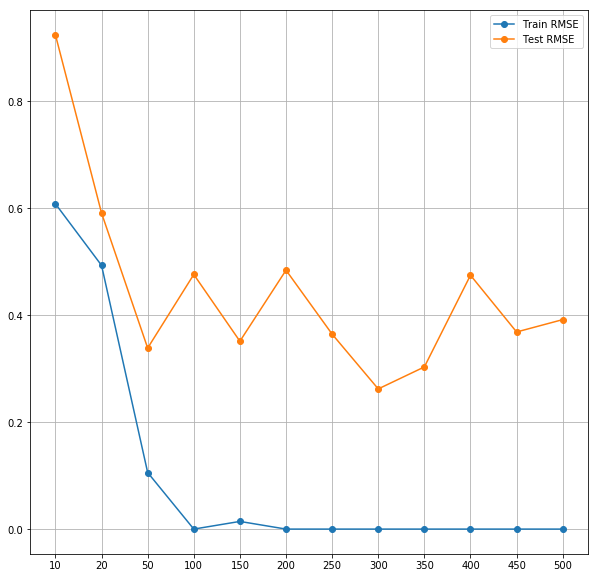

In [143]:
print(nIterationsList)
error = pd.DataFrame(error)
print(error)
plt.figure(figsize=(10, 10))
plt.plot(error.values[:, 1:], 'o-')
plt.legend(('Train RMSE', 'Test RMSE'))
plt.xticks(range(error.shape[0]), nIterationsList) # , rotation=30, horizontalalignment='right')
plt.grid(True)

It can be observed that the number of iterations with the least RMSE is 300. Therefore, from our analysis, it appears that the best predictions can be made with a neural network of hidden layer configuration [10, 10, 10, 10, 10], trained over 300 iterations.  

## 2. Automobile Data

This dataset (source: UCI Machine Learning repository link: https://archive.ics.uci.edu/ml/datasets/auto+mpg) contains the following features:

* mpg
* cylinders
* displacement
* horsepower
* weight
* acceleration
* model year
* origin
* car name

Out of these, we shall try to predict the mpg (miles per gallon) and horsepower for a car using the remaining features, except car name, as input. Let's process this data and split it into training and testing datasets.

In [146]:
def missingIsNan(s):
    return np.nan if s == b'?' else float(s)

# 1. Load the data.
data = np.loadtxt("auto-mpg.data", usecols = range(8), converters = {3: missingIsNan})

# 2. 'Clean' the data.
Cdata = data[~np.isnan(data).any(axis = 1)]

# 3. Split it into input (X) and target (T)
#    Target = mpg (1), horsepower (4)
#    Input = columns 2,3,5,6,7,8
T = Cdata[:, [0,3]]
X = Cdata[:, [1,2,4,5,6,7]]

# 4. Split the data into training (80 %) and testing data (20 %)
nRows = X.shape[0]
nTrain = int(round(0.8*nRows)) 
nTest = nRows - nTrain

# Shuffle row numbers
rows = np.arange(nRows)
np.random.shuffle(rows)

trainIndices = rows[:nTrain]
testIndices = rows[nTrain:]

Xtrain = X[trainIndices, :]
Ttrain = T[trainIndices, :]
Xtest = X[testIndices, :]
Ttest = T[testIndices, :]

In [147]:
Xtrain.shape, Ttrain.shape, Xtest.shape, Ttest.shape

((314, 6), (314, 2), (78, 6), (78, 2))

## Varying Hidden-Layer Structure

Now, let's commence training the network using this data with several different hidden layer structures. **Note: The following excerpt of code was heavily influenced by the one provided by Dr Charles Anderson in CS445 class notes.** 

hiddens = [0, [1], [1, 1], [1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1, 1], [5], [5, 5], [5, 5, 5], [5, 5, 5, 5], [5, 5, 5, 5, 5], [10], [10, 10], [10, 10, 10], [10, 10, 10, 10], [10, 10, 10, 10, 10], [20], [20, 20], [20, 20, 20], [20, 20, 20, 20], [20, 20, 20, 20, 20], [50], [50, 50], [50, 50, 50], [50, 50, 50, 50], [50, 50, 50, 50, 50]]
                       0          1          2
0                      0   9.203005   7.907809
1                    [1]  11.496503  10.024141
2                 [1, 1]  11.514176   9.999238
3              [1, 1, 1]  11.529708  10.049989
4           [1, 1, 1, 1]  11.550314  10.040395
5        [1, 1, 1, 1, 1]  11.632178  10.192936
6                    [5]   7.777723   7.283744
7                 [5, 5]   6.411105   6.490705
8              [5, 5, 5]   5.705643   7.163303
9           [5, 5, 5, 5]   6.603021   7.426072
10       [5, 5, 5, 5, 5]   6.150137   6.863706
11                  [10]   5.709229   7.339158
12              [10, 10]   4.495179   8.275254
13      

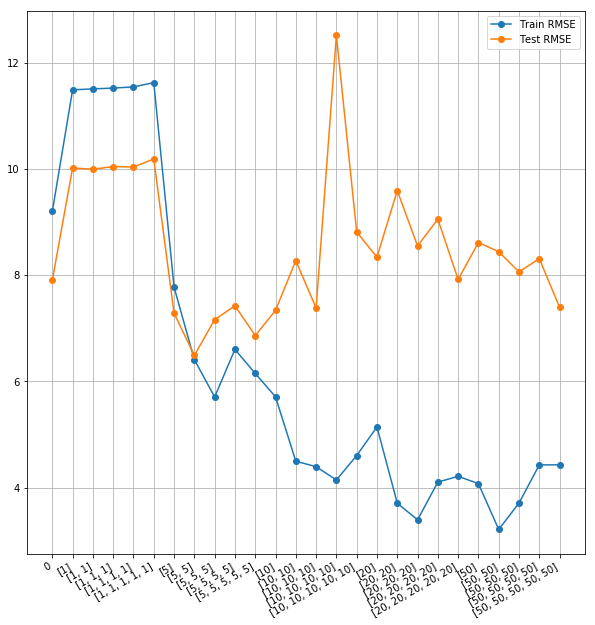

In [150]:
# Initialize empty list to hold the RMSE values in the following format:
# [Hidden Layer Structure, RMSE of training data, RMSE of test data]
errors = []

# Initialize list of hidden layer structures.
hiddens = [0] + [[nu] * nl for nu in [1, 5, 10, 20, 50] for nl in [1, 2, 3, 4, 5]]
print('hiddens =', hiddens)

# Iterate through the hidden layer structures and with each one, commence training. After this, RMSE values are appended to the 
# *error* list
for hids in hiddens: 
    nnet = nn2.NeuralNetwork(Xtrain.shape[1], hids, Ttrain.shape[1])
    nnet.train(Xtrain, Ttrain, 500)
    errors.append([hids, rmse(Ttrain, nnet.use(Xtrain)), rmse(Ttest, nnet.use(Xtest))])
errors = pd.DataFrame(errors)
print(errors)

# Plot error values for train and test samples.
plt.figure(figsize=(10, 10))
plt.plot(errors.values[:, 1:], 'o-')
plt.legend(('Train RMSE', 'Test RMSE'))
plt.xticks(range(errors.shape[0]), hiddens, rotation=30, horizontalalignment='right')
plt.grid(True)

### Observations

From the plot above, it is evident to us that, the RMSE for test data is the lowest for the hidden layer structure [5, 5], at a value little greater than 6. For the training data, the RMSE reaches global minimum for the structure [50, 50]. For the test data, very bad predictions were being made apparently for the hidden layers [1] to [1, 1, 1, 1, 1]. After this, the RMSE falls rapidly to reach the global minimum at [5,5]. 

We can also notice that, the worst structure to use would be [10, 10, 10, 10] since with this configuration, the RMSE shoots up to the global maximum value greater than 12. Even with the [50, 50, 50] structure, the RMSE value lingers around 8. But in any case, this network wont be making good predictions since the RMSE values are so high (greater than 6). Now, we shall use this hidden layer structure which gives us the best performance, and try different numbers of iterations with it. But let's try another run of the above training. 

hiddens = [0, [1], [1, 1], [1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1, 1], [5], [5, 5], [5, 5, 5], [5, 5, 5, 5], [5, 5, 5, 5, 5], [10], [10, 10], [10, 10, 10], [10, 10, 10, 10], [10, 10, 10, 10, 10], [20], [20, 20], [20, 20, 20], [20, 20, 20, 20], [20, 20, 20, 20, 20], [50], [50, 50], [50, 50, 50], [50, 50, 50, 50], [50, 50, 50, 50, 50]]
                       0          1          2
0                      0   9.203005   7.907809
1                    [1]  11.502761  10.028706
2                 [1, 1]  11.533449  10.042429
3              [1, 1, 1]  11.545212  10.047844
4           [1, 1, 1, 1]  11.548787  10.063853
5        [1, 1, 1, 1, 1]  11.583016  10.072343
6                    [5]   7.633075   7.847345
7                 [5, 5]   6.437549   7.977987
8              [5, 5, 5]   6.431532   7.734947
9           [5, 5, 5, 5]   6.389031   6.779832
10       [5, 5, 5, 5, 5]   5.604704   7.884843
11                  [10]   6.063746   7.469331
12              [10, 10]   4.935504   8.599657
13      

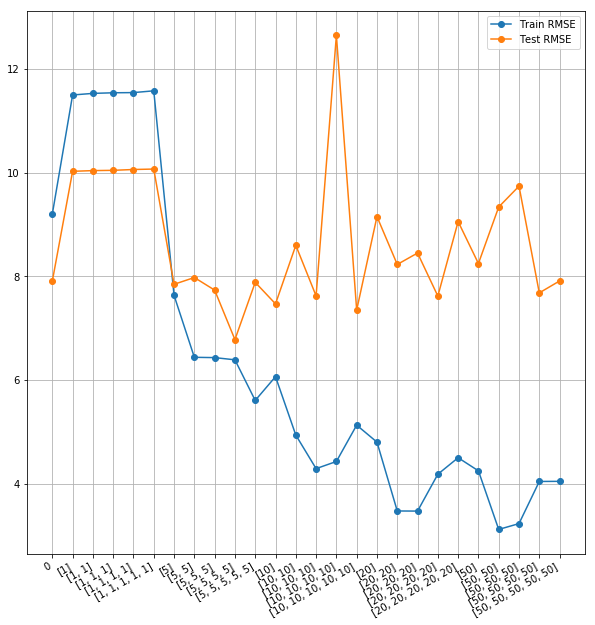

In [168]:
# Initialize empty list to hold the RMSE values in the following format:
# [Hidden Layer Structure, RMSE of training data, RMSE of test data]
errors = []

# Initialize list of hidden layer structures.
hiddens = [0] + [[nu] * nl for nu in [1, 5, 10, 20, 50] for nl in [1, 2, 3, 4, 5]]
print('hiddens =', hiddens)

# Iterate through the hidden layer structures and with each one, commence training. After this, RMSE values are appended to the 
# *error* list
for hids in hiddens: 
    nnet = nn2.NeuralNetwork(Xtrain.shape[1], hids, Ttrain.shape[1])
    nnet.train(Xtrain, Ttrain, 500)
    errors.append([hids, rmse(Ttrain, nnet.use(Xtrain)), rmse(Ttest, nnet.use(Xtest))])
errors = pd.DataFrame(errors)
print(errors)

# Plot error values for train and test samples.
plt.figure(figsize=(10, 10))
plt.plot(errors.values[:, 1:], 'o-')
plt.legend(('Train RMSE', 'Test RMSE'))
plt.xticks(range(errors.shape[0]), hiddens, rotation=30, horizontalalignment='right')
plt.grid(True)

In this case, the least RMSE appears to occur at [5, 5, 5, 5] instead. Let's try another run.

hiddens = [0, [1], [1, 1], [1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1, 1], [5], [5, 5], [5, 5, 5], [5, 5, 5, 5], [5, 5, 5, 5, 5], [10], [10, 10], [10, 10, 10], [10, 10, 10, 10], [10, 10, 10, 10, 10], [20], [20, 20], [20, 20, 20], [20, 20, 20, 20], [20, 20, 20, 20, 20], [50], [50, 50], [50, 50, 50], [50, 50, 50, 50], [50, 50, 50, 50, 50]]
                       0          1          2
0                      0   9.203005   7.907809
1                    [1]  11.504081  10.026096
2                 [1, 1]  11.533433  10.043049
3              [1, 1, 1]  11.538666  10.054723
4           [1, 1, 1, 1]  11.542895  10.054089
5        [1, 1, 1, 1, 1]  11.570695  10.062063
6                    [5]   7.736179   7.206440
7                 [5, 5]   6.152604   7.517732
8              [5, 5, 5]   6.320468   8.230422
9           [5, 5, 5, 5]   5.838741   7.650494
10       [5, 5, 5, 5, 5]   5.888443   7.537997
11                  [10]   6.030113   7.563987
12              [10, 10]   4.933603   8.246690
13      

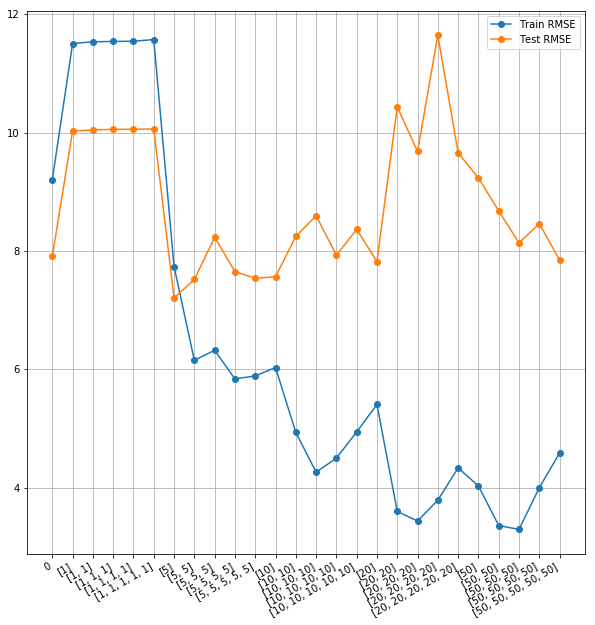

In [169]:
# Initialize empty list to hold the RMSE values in the following format:
# [Hidden Layer Structure, RMSE of training data, RMSE of test data]
errors = []

# Initialize list of hidden layer structures.
hiddens = [0] + [[nu] * nl for nu in [1, 5, 10, 20, 50] for nl in [1, 2, 3, 4, 5]]
print('hiddens =', hiddens)

# Iterate through the hidden layer structures and with each one, commence training. After this, RMSE values are appended to the 
# *error* list
for hids in hiddens: 
    nnet = nn2.NeuralNetwork(Xtrain.shape[1], hids, Ttrain.shape[1])
    nnet.train(Xtrain, Ttrain, 500)
    errors.append([hids, rmse(Ttrain, nnet.use(Xtrain)), rmse(Ttest, nnet.use(Xtest))])
errors = pd.DataFrame(errors)
print(errors)

# Plot error values for train and test samples.
plt.figure(figsize=(10, 10))
plt.plot(errors.values[:, 1:], 'o-')
plt.legend(('Train RMSE', 'Test RMSE'))
plt.xticks(range(errors.shape[0]), hiddens, rotation=30, horizontalalignment='right')
plt.grid(True)

### Inference 

This time, the minumum occurs at [5]. It is worthwhile to note that, the initial weight assignment is done randomly, before the weights get pushed around through gradient descent (to achieve minimum RMSE). It is because of this reason that these variations happen even though we're using the same configuration. There is a degree of randomness involved in the training process. 

However, we can see that more or less, the minumum seems to occur around [5] and [5,5,5,5]. Now let's take the structure [5,5]. Since the RMSE seems to be the lowest here for the test data, we can consider this structure to be the best in terms of neural network performance (this structure of hidden layer will make the best predictions). So let's use [5,5] and try different number of training iterations. 

## Varying Number of Iterations

In [177]:
# Initialize nIterationList which holds the different number of iterations to try, and *errorlist* to store the RMSE values.
nIterationList = [10, 20, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
hidden = [5,5]
errorlist = []

Let's loop through the different number of iterations and train the neural network accordingly.

In [178]:
for iter in nIterationsList:
    nnet = nn2.NeuralNetwork(Xtrain.shape[1], hidden, Ttrain.shape[1])
    nnet.train(Xtrain, Ttrain, iter)
    errorlist.append([iter, rmse(Ttrain, nnet.use(Xtrain)), rmse(Ttest, nnet.use(Xtest))])

In [179]:
errorlist = pd.DataFrame(errorlist)

[10, 20, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
      0          1         2
0    10  11.072244  8.988337
1    20   8.849636  7.850504
2    50   7.645229  7.131066
3   100   7.576140  6.844983
4   150   6.919792  7.187570
5   200   6.236856  7.408364
6   250   6.450069  7.023218
7   300   6.371679  6.917340
8   350   6.316594  6.721265
9   400   6.520446  6.625150
10  450   6.185261  6.518122
11  500   6.287779  7.176626


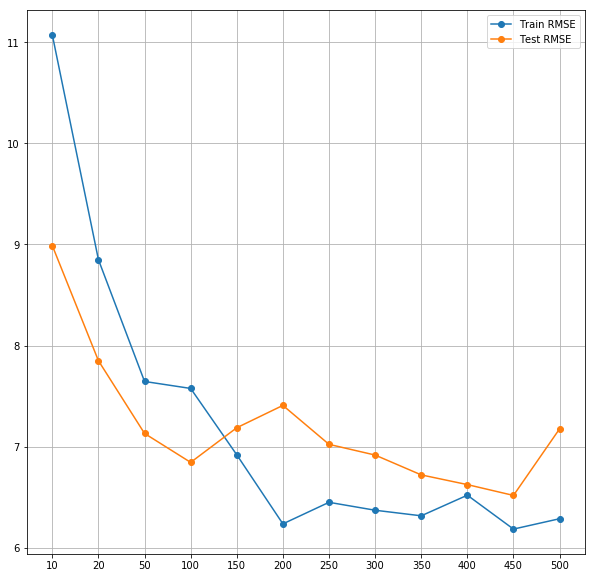

In [180]:
print(nIterationsList)
print(errorlist)
plt.figure(figsize=(10, 10))
plt.plot(errorlist.values[:, 1:], 'o-')
plt.legend(('Train RMSE', 'Test RMSE'))
plt.xticks(range(errorlist.shape[0]), nIterationsList)
plt.grid(True)

### Observations

We can notice that the training data's RSME falls rapidly in the first 200 iterations, and seems to level off in this range, in subsequent iterations. The test data's RMSE drops down from smoothly in the first 100 iterations, then rises a bit till the 200th iterations. After this, it decreases to the global minimum at the 450th iteration, and begins to climb sharply in later iterations. So from this plot, it seems that 450 iterations would result in a trained network with the best performance. Let's try more runs. 

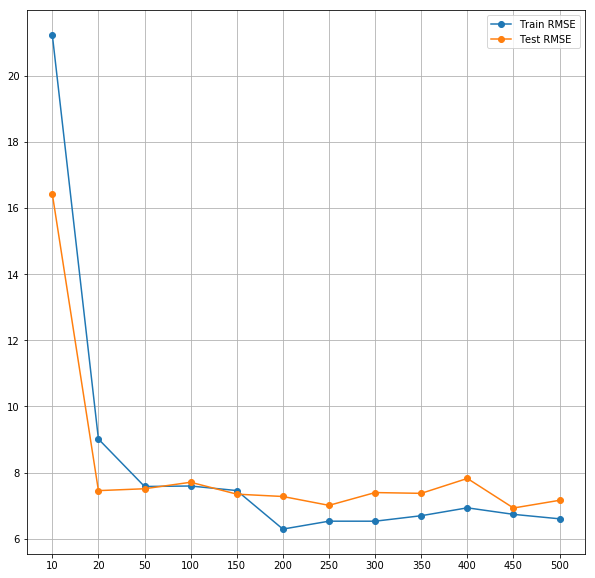

In [183]:
errorlist = []
for iter in nIterationsList:
    nnet = nn2.NeuralNetwork(Xtrain.shape[1], hidden, Ttrain.shape[1])
    nnet.train(Xtrain, Ttrain, iter)
    errorlist.append([iter, rmse(Ttrain, nnet.use(Xtrain)), rmse(Ttest, nnet.use(Xtest))])
errorlist = pd.DataFrame(errorlist)
plt.figure(figsize=(10, 10))
plt.plot(errorlist.values[:, 1:], 'o-')
plt.legend(('Train RMSE', 'Test RMSE'))
plt.xticks(range(errorlist.shape[0]), nIterationsList)
plt.grid(True)

In this case, the least RMSE (for test data) occurs at the 200th iteration. After the 200th iteration, the RMSE values don't seem to fluctuate too much.

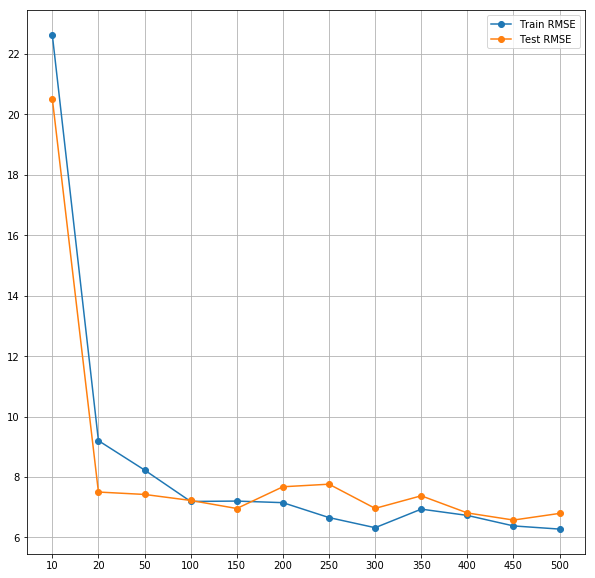

In [185]:
errorlist = []
for iter in nIterationsList:
    nnet = nn2.NeuralNetwork(Xtrain.shape[1], hidden, Ttrain.shape[1])
    nnet.train(Xtrain, Ttrain, iter)
    errorlist.append([iter, rmse(Ttrain, nnet.use(Xtrain)), rmse(Ttest, nnet.use(Xtest))])
errorlist = pd.DataFrame(errorlist)
plt.figure(figsize=(10, 10))
plt.plot(errorlist.values[:, 1:], 'o-')
plt.legend(('Train RMSE', 'Test RMSE'))
plt.xticks(range(errorlist.shape[0]), nIterationsList)
plt.grid(True)

In this plot, the RMSE (for test data) falls rapidly in the first 20 iterations, and fluctuates a bit, finally reaching the minimum value at 450 iterations.

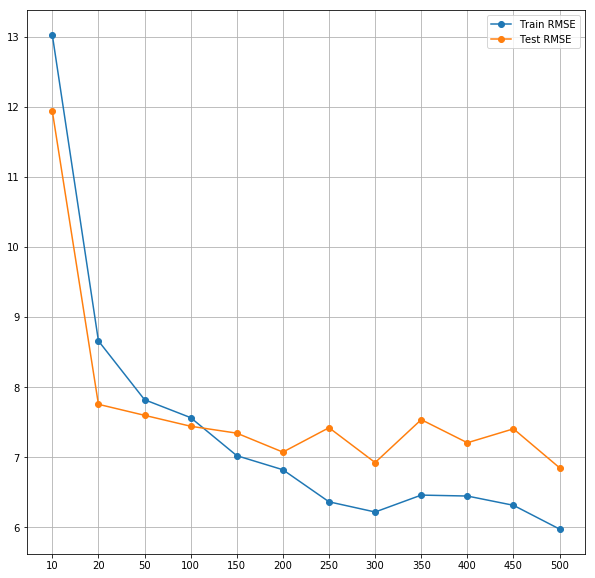

In [186]:
errorlist = []
for iter in nIterationsList:
    nnet = nn2.NeuralNetwork(Xtrain.shape[1], hidden, Ttrain.shape[1])
    nnet.train(Xtrain, Ttrain, iter)
    errorlist.append([iter, rmse(Ttrain, nnet.use(Xtrain)), rmse(Ttest, nnet.use(Xtest))])
errorlist = pd.DataFrame(errorlist)
plt.figure(figsize=(10, 10))
plt.plot(errorlist.values[:, 1:], 'o-')
plt.legend(('Train RMSE', 'Test RMSE'))
plt.xticks(range(errorlist.shape[0]), nIterationsList)
plt.grid(True)

Here, once again, the least RMSE occure at 450 iterations. However, this time, lets try upto a 1000 iterations.

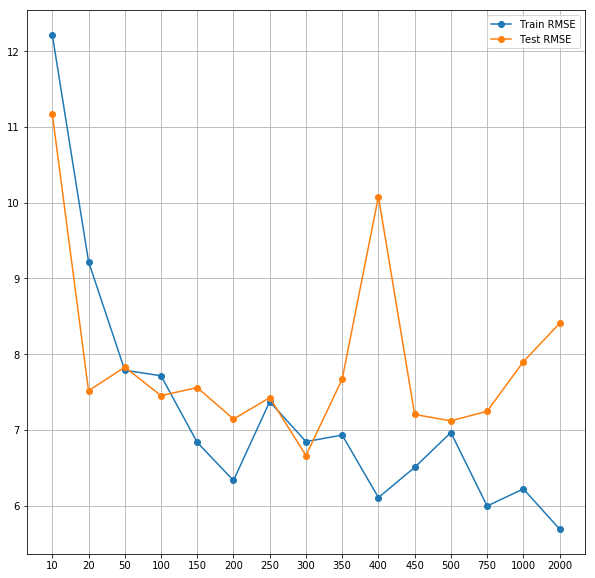

In [191]:
nIterationsList = [10, 20, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 750, 1000, 2000]
errorlist = []
for iter in nIterationsList:
    nnet = nn2.NeuralNetwork(Xtrain.shape[1], hidden, Ttrain.shape[1])
    nnet.train(Xtrain, Ttrain, iter)
    errorlist.append([iter, rmse(Ttrain, nnet.use(Xtrain)), rmse(Ttest, nnet.use(Xtest))])
errorlist = pd.DataFrame(errorlist)
plt.figure(figsize=(10, 10))
plt.plot(errorlist.values[:, 1:], 'o-')
plt.legend(('Train RMSE', 'Test RMSE'))
plt.xticks(range(errorlist.shape[0]), nIterationsList)
plt.grid(True)

The RSME seems to shoot up at 1000 iterations, but the minimum occurs at the 300th iteration in this case.

### Inference

We can see from the various plots that, the minimum RMSE seems to occur at around 300 - 450, which appear to be good choices for the training process. Since these values result in the least RSMEs, they might result in a well-trained network which could make the best predictions. 

## Grading and Check-in

Your notebook will be run and graded automatically. Test this grading process by first downloading [A2grader.tar](http://www.cs.colostate.edu/~anderson/cs445/notebooks/A2grader.tar) and extract `A2grader.py` from it. Run the code in the following cell to demonstrate an example grading session. You should see a perfect execution score of  60 / 60 if your functions and class are defined correctly. The remaining 40 points will be based on the results you obtain from the comparisons of hidden layer structures and numbers of training iterations on the automobile data.

For the grading script to run correctly, you must first name this notebook as `Lastname-A2.ipynb` with `Lastname` being your last name, and then save this notebook.  Your working director must also contain `neuralnetworksA2.py` and `mlutilities.py` from lecture notes.

Combine your notebook and `neuralnetworkA2.py` into one zip file or tar file.  Name your tar file `Lastname-A2.tar` or your zip file `Lastname-A2.zip`.  Check in your tar or zip file using the `Assignment 2` link in Canvas.

A different, but similar, grading script will be used to grade your checked-in notebook. It will include other tests.

In [166]:
%run -i A2grader.py


======================= Code Execution =======================

Extracting python code from notebook named 'Madharapakkam Pagadala-A2.ipynb' and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.

Testing  import neuralnetworksA2 as nn

--- 10/10 points. The statement  import neuralnetworksA2 as nn  works.

Testing nnet = nn.NeuralNetwork(1, 10, 1)

--- 10/10 points. nnet correctly constructed

Testing a = nnet.activation(-0.8)

--- 10/10 points. activation of -0.664036770267849 is correct.

Testing da = nnet.activationDerivative(-0.664)

--- 10/10 points. activationDerivative of 0.5591039999999999 is correct.

Testing X = np.arange(300).reshape((-1, 3))
        T = X[:,0:2] + 0.1 * X[:,1:2] * X[:,2:3]
        import neuralnetworksA2 as nn
        nnet = nn.NeuralNetwork(3, [20, 10], 2)
        nnet.train(X, T, 100)
        error = np.sqrt(np.mean((T - nnet.use(X))**2))

--- 20/20 points. The error of 1.1453814268859053 is corr

## Extra Credit

Repeat the comparisons of hidden layer structures and numbers of training iterations on a second data set from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml).